## Final Project - Shafya Nadour, Will Berritt, Jonathan Burns

Pull in the two video game production datasets from github

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Source Outline

* https://www.kaggle.com/datasets/gregorut/videogamesales
* https://www.kaggle.com/datasets/andreshg/videogamescompaniesregions?select=video-games-developers.csv

In [16]:
# Import the data
vg_devs = pd.read_csv('https://raw.githubusercontent.com/jonburns2454/Data-620/master/DATA/video_game_data.csv')
vg_country = pd.read_csv('https://raw.githubusercontent.com/jonburns2454/Data-620/master/DATA/video-games-developers.csv')

### 1. Cleaning and formatting the dataframes

This data should be cleaned to make network analysis easier down the road

In [17]:
# First the year columns need to be converted to remove the trailing zeros in the dev and country datasets
vg_devs['Year'] = vg_devs['Year'].fillna(-1).astype(int).astype(str)
#Replace -1 with NaN
vg_devs['Year'] = vg_devs['Year'].replace('-1', 'NaN')

In [18]:
# The year column in the country data set has some weird formatting so we need to take only the first 4 numbers. there are characters and merged cells

vg_country['Est.'] = vg_country['Est.'].astype(str).str.slice(0, 4)
vg_country['Est.'] = pd.to_numeric(vg_country['Est.'], errors='coerce')

vg_country['Est.'] = vg_country['Est.'].fillna(-1).astype(int).astype(str)
#Replace -1 with NaN
vg_country['Est.'] = vg_country['Est.'].replace('-1', 'NaN')
# Replace column name so it is easier to work with and makes more sense
vg_country = vg_country.rename(columns={'Est.': 'year_established'})

In [23]:
# merge the two datasets on the developer name and take the country and year established columns
vg_merge = vg_devs.merge(vg_country[['Developer', 'Country', 'year_established']], how='left', left_on='Publisher', right_on='Developer')

Because the video game production industry is a oligopoly many of the missing values generated from the merge are due to parent companies like Take-Two interactive and Microsoft game studios own numerous of these large gaming companies and they are not present on the dev dataset. Keep this fact in mind moving forward

### 2. Generating exploratory data analysis

In [24]:
print(vg_merge.head())

   Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales Developer Country  \
0     41.49     29.02      3.77         8.46         82.74  Nintendo   Japan   
1     29.08      3.58      6.81         0.77         40.24  Nintendo   Japan   
2     15.85     12.88      3.79         3.31         35.82  Nintendo   Japan   
3     15.75     11.01      3.28         2.96         33.00  Nintendo   Japan   
4     11.27      8.89     10.22         1.00         31.37  Nintendo   Japan   

  year_established  
0             1889  
1             1889  

In [25]:
vg_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 16597
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              16598 non-null  int64  
 1   Name              16598 non-null  object 
 2   Platform          16598 non-null  object 
 3   Year              16598 non-null  object 
 4   Genre             16598 non-null  object 
 5   Publisher         16540 non-null  object 
 6   NA_Sales          16598 non-null  float64
 7   EU_Sales          16598 non-null  float64
 8   JP_Sales          16598 non-null  float64
 9   Other_Sales       16598 non-null  float64
 10  Global_Sales      16598 non-null  float64
 11  Developer         9195 non-null   object 
 12  Country           9195 non-null   object 
 13  year_established  9195 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 1.9+ MB


In [26]:
print(vg_merge.describe())

               Rank      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16598.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254      0.264667      0.146652      0.077782      0.048063   
std     4791.853933      0.816683      0.505351      0.309291      0.188588   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     4151.250000      0.000000      0.000000      0.000000      0.000000   
50%     8300.500000      0.080000      0.020000      0.000000      0.010000   
75%    12449.750000      0.240000      0.110000      0.040000      0.040000   
max    16600.000000     41.490000     29.020000     10.220000     10.570000   

       Global_Sales  
count  16598.000000  
mean       0.537441  
std        1.555028  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.470000  
max       82.740000  


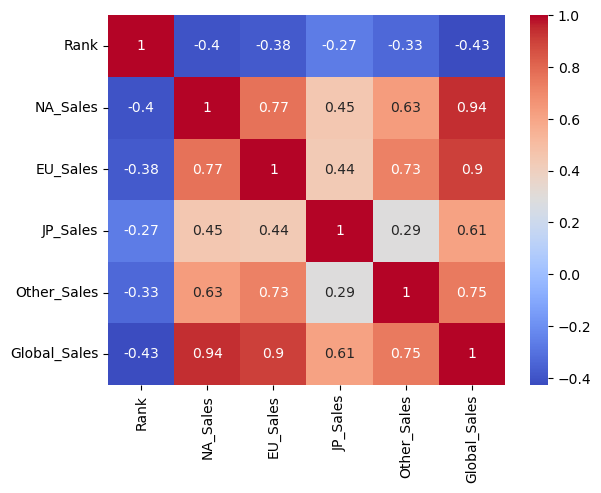

In [27]:
corr_matrix = vg_merge.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

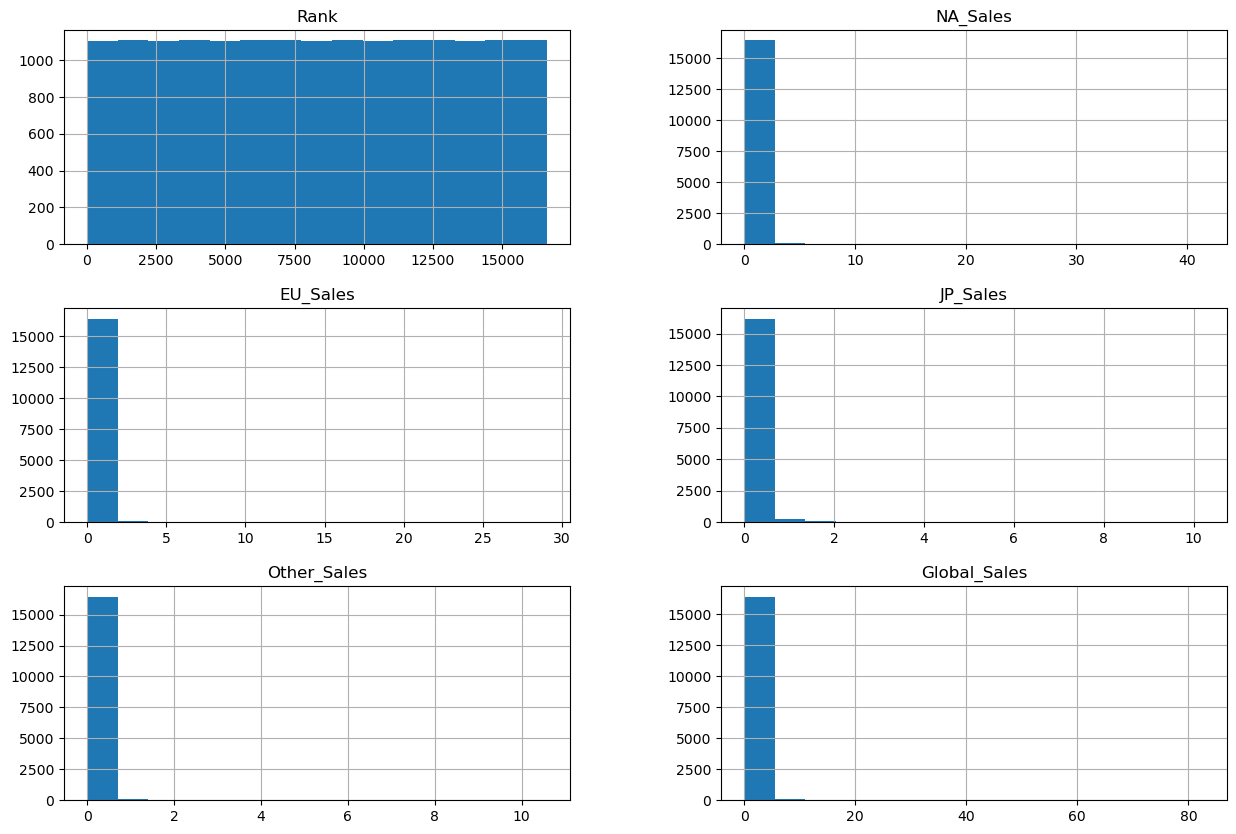

In [28]:
vg_merge.hist(bins=15, figsize=(15, 10))
plt.show()

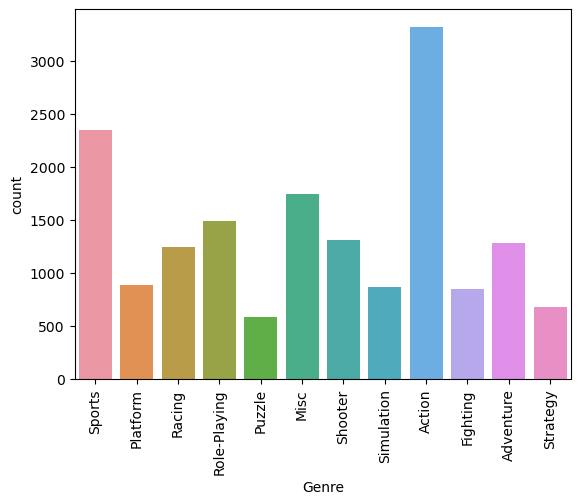

In [32]:
# Count plot for a categorical column
sns.countplot(x='Genre', data=vg_merge)
plt.xticks(rotation=90)
plt.show()

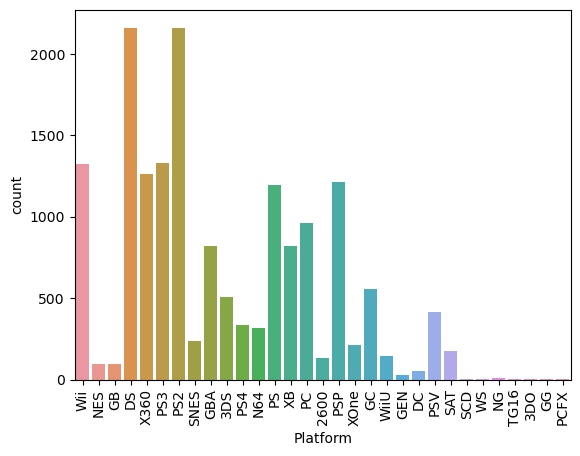

In [33]:
sns.countplot(x='Platform', data=vg_merge)
plt.xticks(rotation=90)
plt.show()

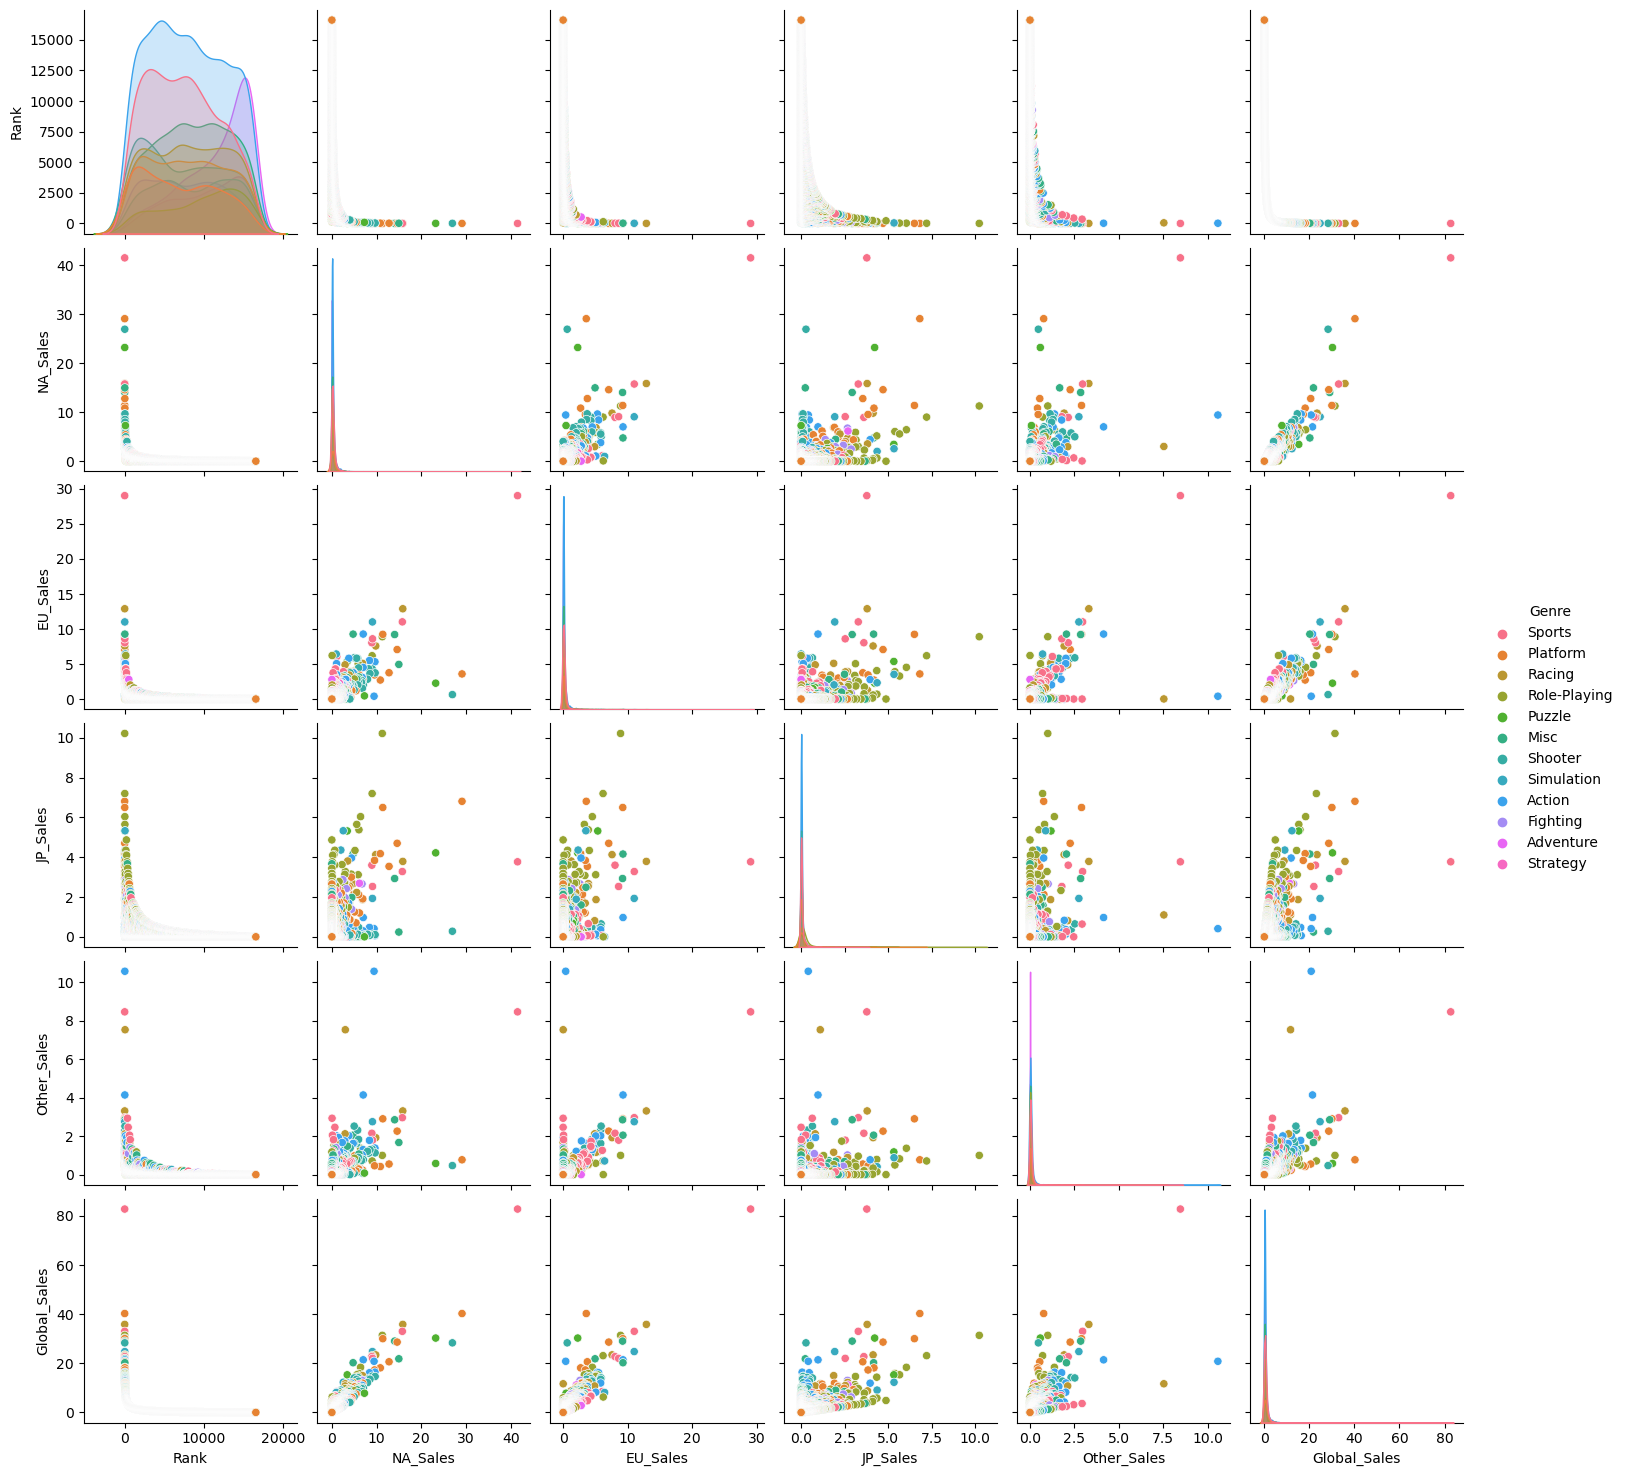

In [37]:
sns.pairplot(vg_merge, hue='Genre')
plt.show()

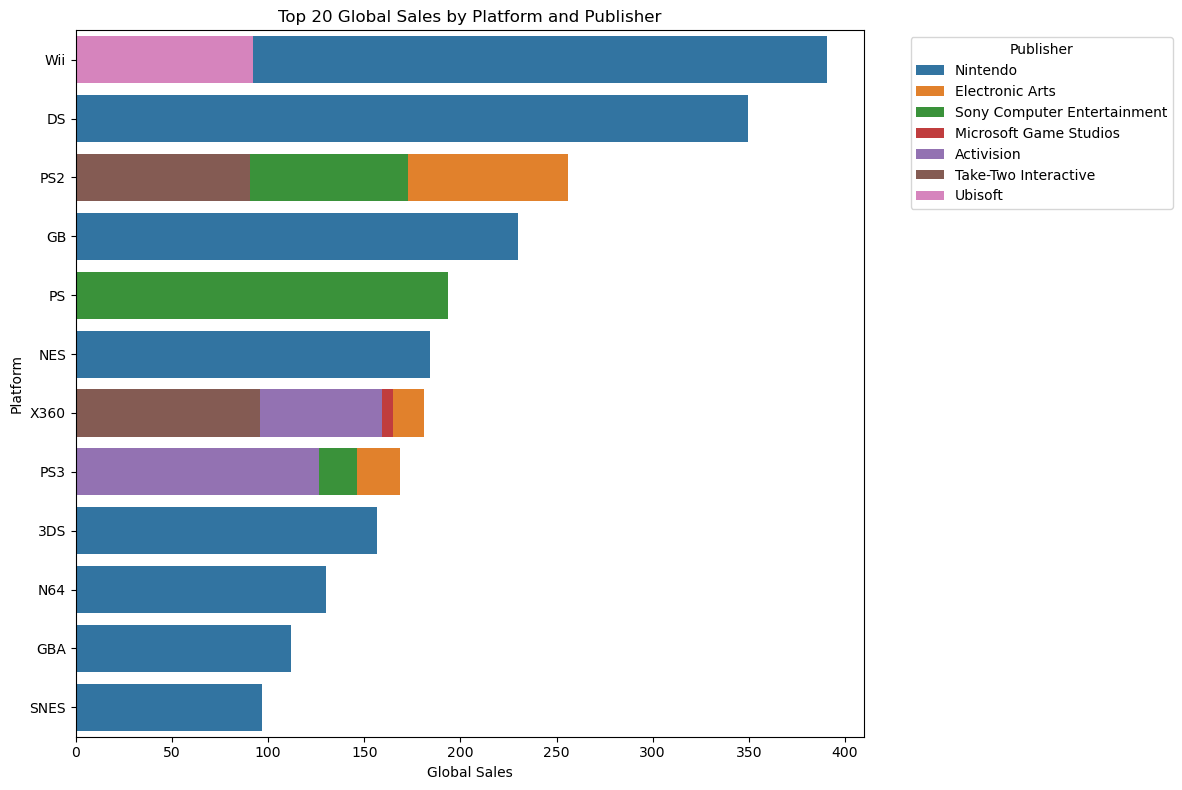

In [36]:

grouped_data = vg_merge.groupby(['Platform', 'Publisher'])['Global_Sales'].sum().reset_index()

top_20 = grouped_data.sort_values(by='Global_Sales', ascending=False).head(20)

# Step 4: Visualization
# Directly plotting the top 20 as a bar chart since it's a more suitable visualization for this scenario
plt.figure(figsize=(12, 8))
sns.barplot(x='Global_Sales', y='Platform', hue='Publisher', data=top_20, dodge=False)
plt.title("Top 20 Global Sales by Platform and Publisher")
plt.xlabel("Global Sales")
plt.ylabel("Platform")
plt.legend(title='Publisher', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()